In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['legend.fontsize'] = 15
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['lines.markersize'] = 8
matplotlib.rcParams['grid.color'] = '0.9'
matplotlib.rcParams['grid.linestyle'] = '-'
matplotlib.rcParams['grid.linewidth'] = 0.5
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
matplotlib.rcParams['savefig.format'] = 'pdf'

blue =  '#377eb8'
orange = '#ff7f00'
green = '#4daf4a'
red = '#e41a1c'

In [4]:
def plot_combined(file_names,picture_name,figsize=(12, 6)):

    # Initialize an empty DataFrame
    combined_df = pd.DataFrame()

    # Read each CSV file and concatenate into a single DataFrame
    for file in file_names:
        df = pd.read_csv(file)
        sizes = np.array(df["Number_of_atoms"])
        times = np.array(df["Time_autograd"])
        num_times = np.array(df["Time_numerical"])
        quotient = num_times / times
        data = {'sizes': sizes, 'times': times, 'num_times': num_times, "quot": quotient}
        temp_df = pd.DataFrame(data)
        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

    # Group by 'sizes' column and calculate the mean for each group
    grouped_df = combined_df.groupby('sizes').mean().reset_index()

    # Sort the grouped DataFrame based on the 'sizes' column
    sorted_df = grouped_df.sort_values(by='sizes')

    # Extract the sorted arrays
    sorted_sizes = sorted_df['sizes'].values
    sorted_times = sorted_df['times'].values
    sorted_num_times = sorted_df['num_times'].values
    sorted_quot = sorted_df['quot'].values
    
    
    plt.figure(figsize=figsize)

    plt.subplot(1, 2, 1)
    plt.scatter(sorted_sizes, sorted_times,c=blue,label="autograd")
    plt.plot(sorted_sizes, sorted_times,c=blue)
    plt.scatter(sorted_sizes, sorted_num_times,c=green,label="numerical")
    plt.plot(sorted_sizes, sorted_num_times,c=green)
    plt.xlabel('System Size')
    plt.ylabel('Time (s)')
    


    plt.subplot(1, 2, 2)

    plt.scatter(sorted_sizes, sorted_quot,c=blue,label="autograd")
    plt.plot(sorted_sizes, sorted_quot,c=blue)
    plt.xlabel('System Size')
    plt.ylabel(r'Time Ratio (Numerical / AD)')

    plt.tight_layout()
    plt.savefig(picture_name)
    plt.show()


# Performance Benchmark: Automatic Differentiation Hessians vs. Central Difference Hessians

### The MOF RSM0011 was scaled from 1x1x1 to 4x4x4 and benchmarked five times to compare Hessian calculations using automatic differentiation against numerical differentiation.

In [5]:
# List of file names
file_names = [
    'benchmark_3d_supercell_mof_free_1.csv',
    'benchmark_3d_supercell_mof_free_2.csv',
    'benchmark_3d_supercell_mof_free_3.csv',
    'benchmark_3d_supercell_mof_free_4.csv',
    'benchmark_3d_supercell_mof_free_5.csv',
]

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Read each CSV file and concatenate into a single DataFrame
for file in file_names:
    df = pd.read_csv(file)
    sizes = np.array(df["Number_of_atoms"])
    times = np.array(df["Time_autograd"])
    num_times = np.array(df["Time_numerical"])
    quotient = num_times / times
    data = {'sizes': sizes, 'times': times, 'num_times': num_times, "quot": quotient}
    temp_df = pd.DataFrame(data)
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Group by 'sizes' column and calculate the mean for each group
grouped_df = combined_df.groupby('sizes').mean().reset_index()

# Sort the grouped DataFrame based on the 'sizes' column
sorted_df = grouped_df.sort_values(by='sizes')

# Extract the sorted arrays
sorted_sizes = sorted_df['sizes'].values
sorted_times = sorted_df['times'].values
sorted_num_times = sorted_df['num_times'].values
sorted_quot = sorted_df['quot'].values

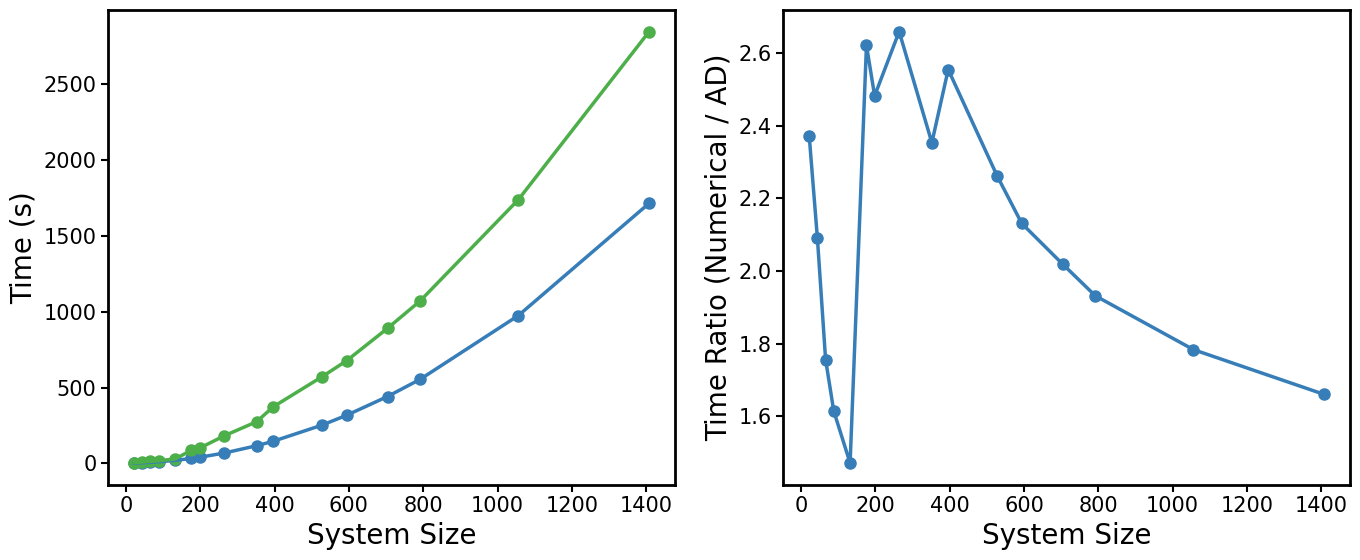

In [8]:
ws_free_files=['benchmark_3d_supercell_mof_free_1.csv',
    'benchmark_3d_supercell_mof_free_2.csv',
    'benchmark_3d_supercell_mof_free_3.csv',
    'benchmark_3d_supercell_mof_free_4.csv',
    'benchmark_3d_supercell_mof_free_5.csv',
             ]
plot_combined(ws_free_files,"presi_benchmark_mof_3d_combined_mean_workstation_free.svg",figsize=(14,6))